In [1]:
import pandas as pd
# --> scorm_tracking_copy.csv
df = pd.read_csv("C:/Users/Oussou/Documents/Rachid Ousmane/cours auto/ODC_AI/Tp2/scorm.csv", sep = ";")
# df = pd.DataFrame(df)
df.head()

,id,actor,session_uuid,object_id,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed
0,1,ga2018_umbe@yopmail.com,session-20,694-vorstellung,lesson,1.0,100.0,589.0,8,25/08/2016 17:22,25/08/2016 17:32,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
1,2,dtic@mobiletic.com,session-33,683-programme-nescens,lesson,1.0,0.0,6194.0,2,25/08/2016 17:27,02/11/2017 15:40,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
2,3,dtic@mobiletic.com,session-37,678-politique-et-cadre-legal,lesson,1.0,71.0,31203.0,11,25/08/2016 17:27,27/10/2017 08:21,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
3,4,dtic@mobiletic.com,session-46,671-presentation,lesson,1.0,22.0,112788.0,7,25/08/2016 17:29,30/11/2017 16:53,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1
4,5,dtic@mobiletic.com,session-52,684-informatique,lesson,1.0,0.0,841.0,4,25/08/2016 17:30,02/11/2017 15:56,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0


In [2]:
# df["object_id"].unique()
nbre_actor = df.groupby("object_id").actor.unique().agg([len])

In [3]:
nbre_session = df.groupby("object_id").session_uuid.agg([len])

In [4]:
score_max_min = df.groupby("object_id").score.agg([max, min])

In [5]:
mydf = pd.concat([nbre_actor, nbre_session, score_max_min], axis=1)
# mydf
type(mydf)

pandas.core.frame.DataFrame

In [6]:
mydf.columns.values[0] = "nbre_actor"
mydf.columns.values[1] = "nbre_session"


In [7]:
mydf = mydf.fillna(0)
mydf

,nbre_actor,nbre_session,max,min
object_id,,,,
632-le-hibou-grand-duc,1,1,0.0,0.0
669-vallee-trient-finhaut-source-de-bien-etre,1,1,0.0,0.0
671-presentation,340,634,100.0,0.0
674-strategie-et-croissance,327,471,100.0,0.0
677-affaires-medicales,322,469,100.0,0.0
...,...,...,...,...
824-nescens,12,22,0.0,0.0
825-die-dienstleistungen-f-r-den-patienten,61,156,100.0,0.0
826-i-servizi-ai-pazienti,12,35,100.0,0.0


In [8]:
# mydf = mydf.reset_index()

In [9]:
i_succes = df.loc[df["score"]>=50].groupby("object_id").actor.nunique()
# i_succes

In [10]:
i_echec = df.loc[df["score"]<50].groupby("object_id").actor.unique()
# i_echec
# df.loc[df["object_id"] == "632-le-hibou-grand-duc"]

In [11]:
mydf["succes_rate%"] = (i_succes/df.groupby('object_id').actor.nunique())*100
mydf.sort_values(['succes_rate%'],ascending=[False],inplace=True)
mydf

,nbre_actor,nbre_session,max,min,succes_rate%
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
734-risques-psychosociaux,124,153,100.0,0.0,98.387097
819-informatique,59,68,100.0,0.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809
...,...,...,...,...,...
816-krankheits-und-unfallbedingte-abwesenheit,89,173,0.0,0.0,NaN
818-nescens,61,92,0.0,0.0,NaN
820-formation,58,71,0.0,0.0,NaN


In [12]:
mydf = mydf.fillna(0)
mydf

,nbre_actor,nbre_session,max,min,succes_rate%
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
734-risques-psychosociaux,124,153,100.0,0.0,98.387097
819-informatique,59,68,100.0,0.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809
...,...,...,...,...,...
816-krankheits-und-unfallbedingte-abwesenheit,89,173,0.0,0.0,0.000000
818-nescens,61,92,0.0,0.0,0.000000
820-formation,58,71,0.0,0.0,0.000000


In [13]:
top10 = mydf.head(10)
top10

,nbre_actor,nbre_session,max,min,succes_rate%
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
734-risques-psychosociaux,124,153,100.0,0.0,98.387097
819-informatique,59,68,100.0,0.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809
766-unbezahlter-urlaub,88,188,100.0,0.0,97.727273
765-urlaub,88,308,100.0,0.0,97.727273
729-salaire,129,255,100.0,0.0,97.674419
747-modification-des-rapports-de-travail,124,242,100.0,0.0,97.580645


### Tableau 2D

In [14]:
import numpy as np
# tab2D= top10.to_numpy()
tab2D = np.array([top10])
tab2D

array([[[123.        , 216.        , 100.        ,   0.        ,
          99.18699187],
        [124.        , 153.        , 100.        ,   0.        ,
          98.38709677],
        [ 59.        ,  68.        , 100.        ,   0.        ,
          98.30508475],
        [ 94.        , 233.        , 100.        ,   0.        ,
          97.87234043],
        [ 89.        , 242.        , 100.        ,   0.        ,
          97.75280899],
        [ 88.        , 188.        , 100.        ,   0.        ,
          97.72727273],
        [ 88.        , 308.        , 100.        ,   0.        ,
          97.72727273],
        [129.        , 255.        , 100.        ,   0.        ,
          97.6744186 ],
        [124.        , 242.        , 100.        ,   0.        ,
          97.58064516],
        [122.        , 270.        , 100.        ,   0.        ,
          96.72131148]]])

### Top10's First and Last informations

## Question 2

In [15]:
top_des_modules = mydf.head(1)
last_des_modules = mydf.tail(1)
# top_des_modules
# top_des_modules.index[0]
# last_des_modules
last_des_modules.index[0]

'824-nescens'

### Pour le top des modules

In [16]:
dataFrame_top_module = df.loc[df['object_id'] == top_des_modules.index[0]].groupby('actor').agg({"session_uuid":['count'],"temps":['sum'],"score":['max']})
dataFrame_top_module['resultat'] = 0 
dataFrame_top_module.loc[dataFrame_top_module.score['max'] >= 50, 'resultat'] = 1
temps_total = dataFrame_top_module.temps/60
dataFrame_top_module = pd.concat([dataFrame_top_module.session_uuid,dataFrame_top_module.temps,dataFrame_top_module.score,dataFrame_top_module.resultat],axis=1)

dataFrame_top_module.rename({"count":"nb_sessions"}, axis=1,inplace=True)
dataFrame_top_module.rename({"sum":"temps_total"}, axis=1,inplace=True)
dataFrame_top_module.rename({"max":"score_max"}, axis=1,inplace=True)

dataFrame_top_module


,nb_sessions,temps_total,score_max,resultat
actor,,,,
dtic@mobiletic.com,4,1546.0,83.0,1
ga2018_05n7@yopmail.com,1,425.0,67.0,1
ga2018_096a@yopmail.com,4,481.0,100.0,1
ga2018_0buu@yopmail.com,1,236.0,67.0,1
ga2018_0hot@yopmail.com,1,449.0,67.0,1
...,...,...,...,...
ga2018_xovt@yopmail.com,1,316.0,50.0,1
ga2018_xsog@yopmail.com,1,380.0,83.0,1
ga2018_yap3@yopmail.com,1,686.0,100.0,1


### Pour le dernier des modules

In [17]:
dataFrame_last_des_modules = df.loc[df['object_id'] == last_des_modules.index[0]].groupby('actor').agg({"session_uuid":['count'],"temps":['sum'],"score":['max']})
dataFrame_last_des_modules['resultat'] = 0 
dataFrame_last_des_modules.loc[dataFrame_last_des_modules.score['max'] >= 50, 'resultat'] = 1

dataFrame_last_des_modules = pd.concat([dataFrame_last_des_modules.session_uuid,dataFrame_last_des_modules.temps,dataFrame_last_des_modules.score,dataFrame_last_des_modules.resultat],axis=1)


dataFrame_last_des_modules.rename({"count":"nb_sessions"}, axis=1,inplace=True)
dataFrame_last_des_modules.rename({"sum":"temps_total"}, axis=1,inplace=True)
dataFrame_last_des_modules.rename({"max":"score_moyenne"}, axis=1,inplace=True)

dataFrame_last_des_modules

,nb_sessions,temps_total,score_moyenne,resultat
actor,,,,
dtic@mobiletic.com,9,214.0,0.0,0
ga2018_2bq4@yopmail.com,1,411.0,0.0,0
ga2018_341q@yopmail.com,1,446.0,0.0,0
ga2018_6a2v@yopmail.com,1,6.0,0.0,0
ga2018_6ys9@yopmail.com,1,259.0,0.0,0
ga2018_8s3m@yopmail.com,1,43.0,0.0,0
ga2018_l70o@yopmail.com,1,77.0,0.0,0
ga2018_tlqd@yopmail.com,1,145.0,0.0,0
ga2018_x19w@yopmail.com,1,9.0,0.0,0


### Suite: Un clin d'oeil à Matplotlib

In [18]:
mydf = mydf.reset_index()
mydf.head(10)

,object_id,nbre_actor,nbre_session,max,min,succes_rate%
0,752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
1,734-risques-psychosociaux,124,153,100.0,0.0,98.387097
2,819-informatique,59,68,100.0,0.0,98.305085
3,755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340
4,761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809
5,766-unbezahlter-urlaub,88,188,100.0,0.0,97.727273
6,765-urlaub,88,308,100.0,0.0,97.727273
7,729-salaire,129,255,100.0,0.0,97.674419
8,747-modification-des-rapports-de-travail,124,242,100.0,0.0,97.580645
9,736-conge-non-paye,122,270,100.0,0.0,96.721311


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def moduleGenerator(num, df, sorted_df, sorted_col):
    sorted_df = sorted_df.reset_index()
    #print(type(sorted_df))
    data = df.loc[df['object_id'] == sorted_df.loc[num, "object_id"]].groupby(["object_id", "actor"]).agg({"temps":['sum'],"score":['max']})
    data = pd.concat([data.temps, data.score],axis=1)
    data.rename({"count":"nb_sessions"}, axis=1,inplace=True)
    data.rename({"sum":"temps_total"}, axis=1,inplace=True)
    data.rename({"max":"score_max"}, axis=1,inplace=True)
    data = data.sort_values(by= sorted_col, ascending= False )
    return data

def boucle(n, df, sorted_df, sorted_col):
    top = list()
    for i in range(n):
        top.append(moduleGenerator(i, df, sorted_df, sorted_col))
    return top

def courbe(module, n):
    plt.figure(figsize=(10, 7))
    for i in range(n):
        # Courbe
        t_minute = module[i]["temps_total"]/60
        x= np.array(t_minute)
        y= np.array(module[i]["score_max"])
#         print(x.shape)
#         print(y.shape)
        plt.plot(x, y, label="Top"+ str(i))  # Plot some data on the (implicit) axes.
        plt.xlabel('Temps(min)')
        plt.ylabel('Score_Max')
        plt.title("Simple Plot")
        plt.legend();
        
def courbe2(module):
    rgActor = []
    scoreActor =[]
    fig, axs = plt.subplots(len(module), 1, figsize=(3, 10))
    for mod in range(len(module)):
        rgActor = np.arange(len(module[mod]))
        scor = module[mod]["score_max"]
#         print(rgActor.shape)
#         print(scor.to_numpy().shape)
        axs[mod].plot(rgActor, scor.to_numpy())
        

# Diagramme en baton        
def bar(module, n):
    plt.figure(figsize=(10, 7))
    for i in range(n):
        module[i] = module[i].reset_index()
        module[i]["succes_rate"] = mydf.loc[i, "succes_rate%"]
        plt.bar(module[i].object_id, module[i]["succes_rate"],  color = "#A0AAE4", edgecolor="red", linewidth=4, ecolor = "green",capsize = 10)  # Plot some data on the (implicit) axes.
        plt.xticks(rotation= "vertical")
        plt.title("Simple Plot")
        plt.ylim((90, 100))
    plt.show()
    
def joinTimeToMydf(mydf, df):
    dftime = df.groupby("object_id").temps.agg(sum)
    dftime = pd.DataFrame(dftime)
    mydf = mydf.set_index("object_id")
    mydf= mydf.sort_values("object_id")
    dftime= dftime.sort_index()
    t = mydf.join(dftime)
    t = t.sort_values(['succes_rate%'],ascending=False)
    return t
    
    
def scatter(module, mydf, df):
    rgMod = range(len(module))
    mydf = joinTimeToMydf(mydf, df).head(len(module))
    plt.figure(figsize=(10, 7))
    plt.scatter(rgMod, (mydf["temps"]/60).to_numpy())
    plt.xlabel("Le Rang")
    plt.ylabel("Temps en min")
    
    
def switch(data):
    if (0<=data<50):
        return "D"
    elif (50<=data<60):
        return "C"
    elif (60<=data<80):
        return "B"
    elif (80<=data<=100):
        return "A"
    else:
        return "Taux anormal"

    
def cammenbert(sorted_df):
    liste1 = []
    a = sorted_df["succes_rate%"]
    liste1.append(a.map(lambda x:switch(x)))
    a = pd.DataFrame(a)
    liste2 = pd.DataFrame(liste1)     
    liste2 = (liste2.T)
    liste2.rename(columns = {"succes_rate%" : "Classe"}, inplace=True)
    dfinal = pd.concat([a, liste2], axis =1)
    dfinal = dfinal.groupby(["Classe"]).count()

    plt.figure(figsize = (8, 8))
    plt.pie(dfinal["succes_rate%"].values, labels = dfinal.index, 
           colors = ['red', 'green', 'yellow', 'blue'],
           explode = [0, 0.1, 0, 0],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1,
           shadow = False)
    plt.legend()


Sur les Combien 1er modules voulez-vous travailler?
10


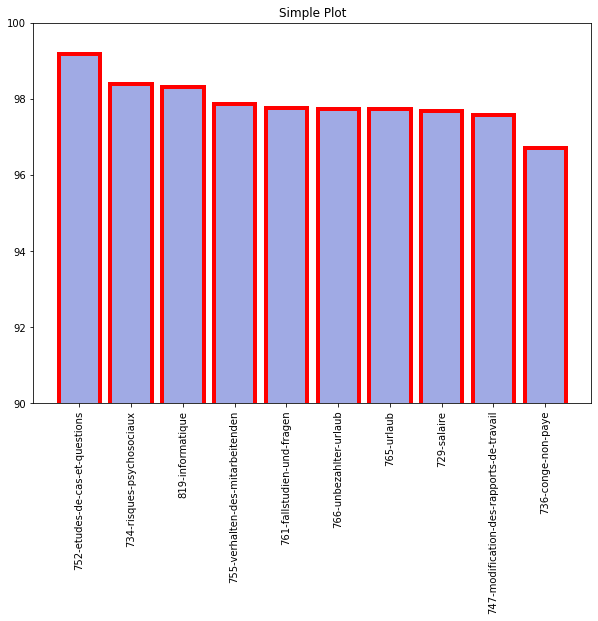

In [24]:
import numpy as np
import matplotlib.pyplot as plt

n = int(input("Sur les Combien 1er modules voulez-vous travailler?\n"))
m1= boucle(n, df, mydf, "temps_total")
m2= boucle(n, df, mydf, "score_max")

# Question1
# courbe(m1, n)
bar(m1,n)
# Question2
# courbe2(m2)
# Question3
# scatter(m1, mydf, df)
# cammenbert(mydf)

In [ ]:
d = cammenbert(mydf)
d["succes_rate%"]